In [1]:
import numpy as np
from scipy.linalg import toeplitz
from scipy.sparse.linalg import minres, cg
import ceo
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n = 4
n_e = 2*n-1
e = np.arange(1,n_e**2+1)
#e

In [3]:
u = np.arange(n_e)-0.5*(n_e-1)
x,y = np.meshgrid(u,u)
e = np.hypot(x,y).ravel()

In [4]:
t = []
for _e_ in np.split(e,2*n-1):
    t += [toeplitz(_e_[n-1::-1],_e_[n-1:])]

q = toeplitz(range(n-1,-1,-1),range(n-1,2*n-1))

c = []
for i in range(n):
    r = []
    for j in range(n):
        r += [t[q[i][j]]]
    c += [np.hstack(r)]
f = np.vstack(c)

#f

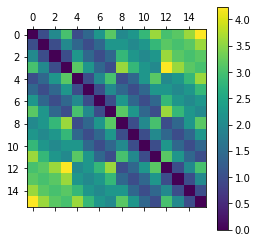

In [5]:
plt.matshow(f)
plt.colorbar()

In [6]:
u = np.ones((n**2,1),dtype=np.float32)

In [7]:
u = np.random.randn(n**2,1).astype(np.float32)

In [8]:
y0 = f@u

In [9]:
x,info = minres(f,y0)
info,x

(0, array([ 0.20020699, -1.25954798, -1.0921737 , -0.87132721,  0.39090424,
        -1.4960558 , -2.11171206,  0.22064153,  0.60820393,  0.6399847 ,
        -0.2414538 , -0.2626989 ,  1.94801413,  0.72557359, -2.20710333,
        -0.42663047]))

In [10]:
np.allclose(f.dot(x).ravel(), y0.ravel())

False

In [11]:
t = ceo.Btbt(1,1,n,n,ceo.cuFloatArray(host_data=e.astype(np.float32)))

In [12]:
y = t.MVM(u.ravel())

In [13]:
np.sqrt(np.sum((y.host()-y0)**2))/y.size

7.869168610264395e-07

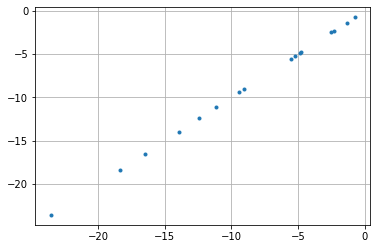

In [14]:
plt.plot(y0,y.host_data,'.')
plt.grid()

In [15]:
s = ceo.Minres(y0.size)

In [16]:
s.N_ITERATION = 1000

s.RTOL = 1e-9
s.ATOL = 1e-6

In [17]:
v = np.zeros_like(y0)

In [18]:
x = ceo.cuFloatArray(host_data=v)
x0 = ceo.cuFloatArray(host_data=v)
b = ceo.cuFloatArray(host_data=y0)

In [19]:
s.solve(x,t,b,x0)

In [20]:
x.host()

array([[ 0.20052321],
       [-1.2600082 ],
       [-1.091947  ],
       [-0.8713482 ],
       [ 0.3905397 ],
       [-1.4956062 ],
       [-2.1117904 ],
       [ 0.22056848],
       [ 0.60849386],
       [ 0.63961244],
       [-0.24130538],
       [-0.26269767],
       [ 1.9478266 ],
       [ 0.72590286],
       [-2.2073476 ],
       [-0.42652476]], dtype=float32)

In [21]:
s.cvgce_iteration,s.RTOL,s.ATOL

(16, 9.999999717180685e-10, 9.999999974752427e-07)

In [22]:
np.allclose(t.MVM(x.host().ravel()).host().ravel(), y0.ravel())

True

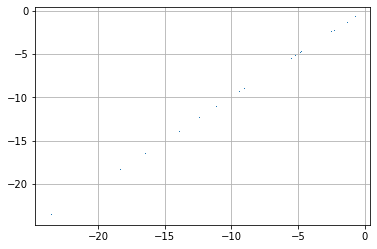

In [23]:
plt.plot(y0.ravel(),t.MVM(x.host().ravel()).host().ravel(),',')
plt.grid()